<a href="https://colab.research.google.com/github/Vijayaranagn/Customer_conversion_Prediction/blob/main/Vijay_New_Customer_Conversion_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Statement**

You are working for a new-age insurance company and employ multiple outreach plans to sell term insurance to your customers. Telephonic marketing campaigns still remain one of the most effective way to reach out to people however they incur a lot of cost. Hence, it is important to identify the customers that are most likely to convert beforehand so that they can be specifically targeted via call. We are given the historical marketing data of the insurance company and are required to build a ML model that will predict if a client will subscribe to the insurance. 



# **Importing necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split 

from sklearn import metrics 
import seaborn as sns 
import matplotlib.pyplot as plt 

import warnings 
warnings.filterwarnings("ignore")


#**Dataset**

In [ ]:
df = pd.read_csv("/content/train.csv")
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


### ***CHECKING BALANCED OR NOT***

In [ ]:
df.shape

(45211, 11)

In [ ]:
((39922)/(39922+5289))*100

88.30151954170445

In [ ]:
((5289)/(39922+5289))*100

11.698480458295547

In [ ]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [ ]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [ ]:
df.duplicated().sum()

6

In [ ]:
df=df.drop_duplicates()
df.duplicated().sum()

0

*We done the first part.*

In [ ]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [ ]:
df["age"].unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81, 18, 89, 84, 87, 92, 93, 88])

In [ ]:
df["job"].value_counts()

blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [ ]:
df["job"] = df["job"].replace("unknown", df["job"].mode()[0])

In [ ]:
df["job"].value_counts()

blue-collar      10018
management        9457
technician        7596
admin.            5170
services          4153
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64

In [ ]:
df["marital"].value_counts()

married     27210
single      12788
divorced     5207
Name: marital, dtype: int64

In [ ]:
df["education_qual"].value_counts()

secondary    23199
tertiary     13299
primary       6850
unknown       1857
Name: education_qual, dtype: int64

In [ ]:
df["education_qual"] = df["education_qual"].replace("unknown", df["education_qual"].mode()[0])

In [ ]:
df["education_qual"].value_counts()

secondary    25056
tertiary     13299
primary       6850
Name: education_qual, dtype: int64

In [ ]:
df["call_type"].value_counts()

cellular     29282
unknown      13017
telephone     2906
Name: call_type, dtype: int64

In [ ]:
df["day"].unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31])

In [ ]:
df["mon"].value_counts()

may    13765
jul     6894
aug     6245
jun     5339
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

In [ ]:
df["dur"].unique()

array([ 261,  151,   76, ..., 1298, 1246, 1556])

In [ ]:
df["num_calls"].unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44])

In [ ]:
df["prev_outcome"].value_counts()

unknown    36953
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [ ]:
df["y"].value_counts()

no     39916
yes     5289
Name: y, dtype: int64

In [ ]:
df.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898
std,10.619130,8.32234,257.538504,3.098189
min,18.000000,1.00000,0.000000,1.000000
25%,33.000000,8.00000,103.000000,1.000000
50%,39.000000,16.00000,180.000000,2.000000
75%,48.000000,21.00000,319.000000,3.000000
max,95.000000,31.00000,4918.000000,63.000000


In [ ]:
df[df["prev_outcome"]=="success"].y.value_counts()

yes    978
no     533
Name: y, dtype: int64

In [ ]:
values = ["success", "failure", "other"]
for i in values:
  print("percentage of positive conversion if prev_outcome is", i, len(df[df["prev_outcome"]==i][df["y"]=="yes"]) / len(df[df["prev_outcome"]==i]))
  print("overall yes percenage if prev_outcome is", i , len(df[df["prev_outcome"]==i][df["y"]=="yes"])/len(df[df["y"]=="yes"]))

percentage of positive conversion if prev_outcome is success 0.6472534745201853
overall yes percenage if prev_outcome is success 0.1849120816789563
percentage of positive conversion if prev_outcome is failure 0.1260967149561314
overall yes percenage if prev_outcome is failure 0.11684628474191719
percentage of positive conversion if prev_outcome is other 0.16684782608695653
overall yes percenage if prev_outcome is other 0.05804499905464171


In [ ]:
df["target"] = df["y"].map({"yes":1, "no":0})

In [ ]:
df.groupby("prev_outcome")["target"].mean()

prev_outcome
failure    0.126097
other      0.166848
success    0.647253
unknown    0.091630
Name: target, dtype: float64

## **EDA**
From EDA we can decide the encode type and feature relationships and importance.

In [ ]:
df_ins_yes = df[df['y']=='yes']
df_ins_no = df[df['y']=='no']

##*DISTRIBUTION OF FEATURES*

In [ ]:
def feature(feature):
  plt.subplot(2,2,1)
  sns.countplot(df[feature],order = df[feature].value_counts().index[::-1])
  plt.title("Countplot of "+ feature,size=15)
  plt.xticks(rotation=40)
  plt.subplot(2,2,2)
  sns.countplot(x=feature,hue='y',data=df,order=df[feature].value_counts().index[::-1])
  plt.title("Distribution of "+feature,size=15)
  plt.xticks(rotation=40)
  plt.subplot(2,2,3)
  sns.countplot(df_ins_yes[feature],order=df_ins_yes[feature].value_counts().index[::-1])
  plt.title(feature + " vs (target variable==yes)",size=15)
  plt.xticks(rotation=40)
  plt.subplot(2,2,4)  
  sns.countplot(df_ins_no[feature],order=df_ins_no[feature].value_counts().index[::-1])
  plt.title(feature + " vs (target variable==no)",size=15)
  plt.xticks(rotation=40)
  plt.show()

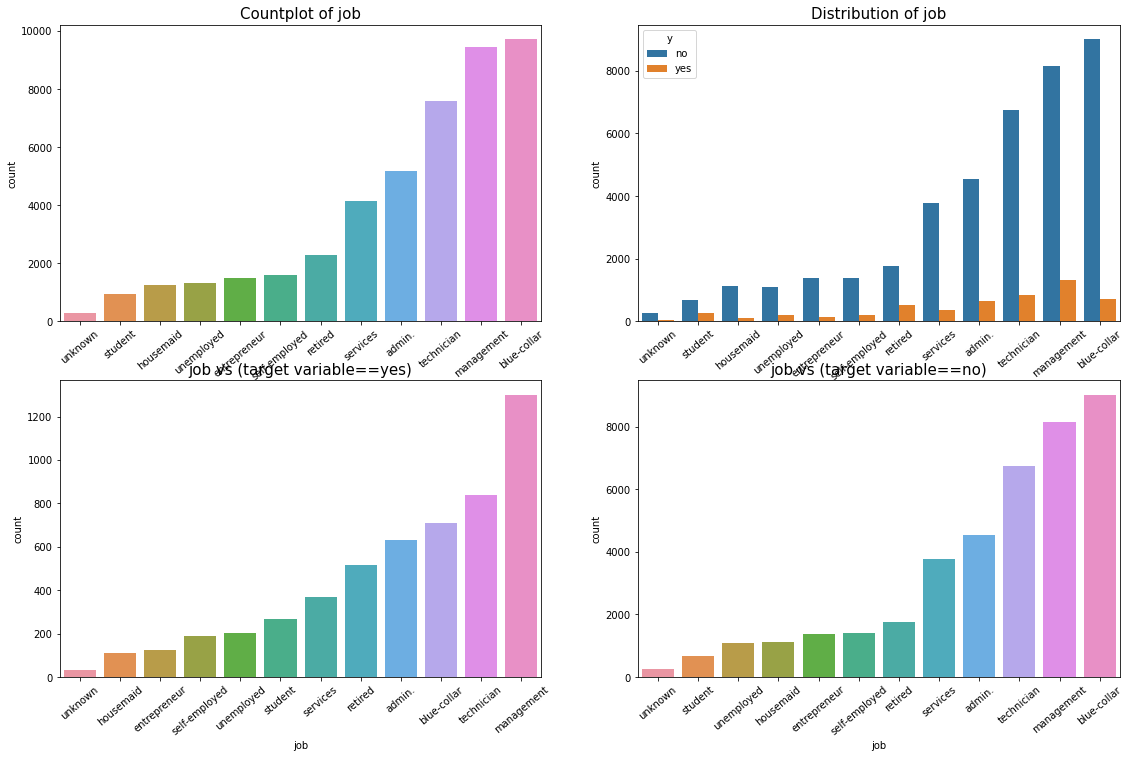

In [ ]:
plt.figure(figsize=(19,12))
feature("job")

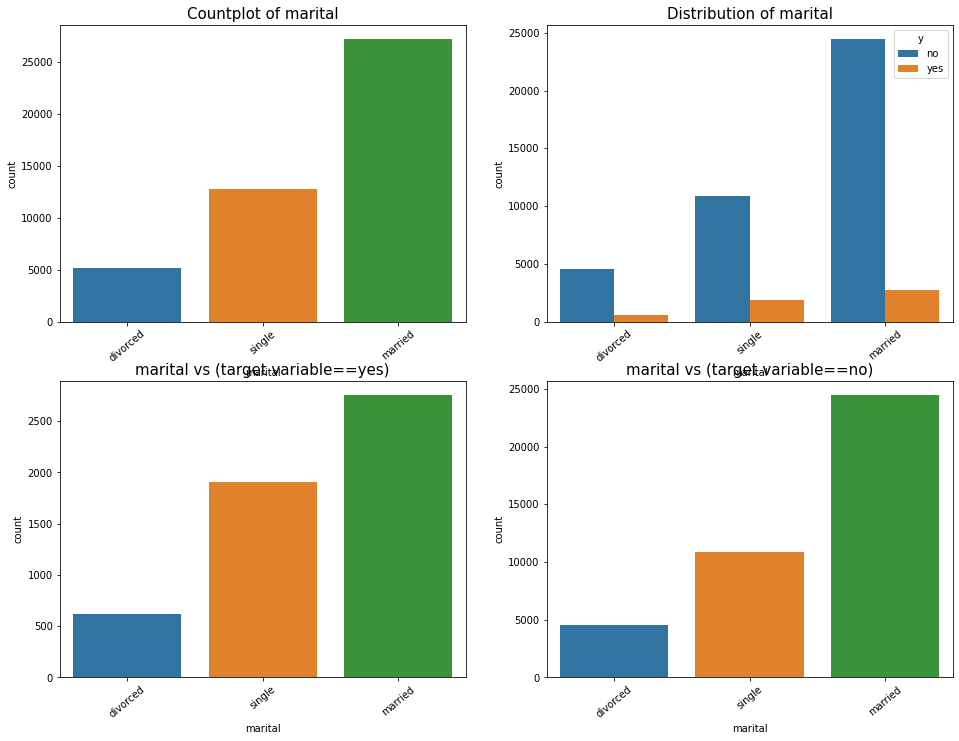

In [ ]:
plt.figure(figsize=(16,12))
feature("marital")

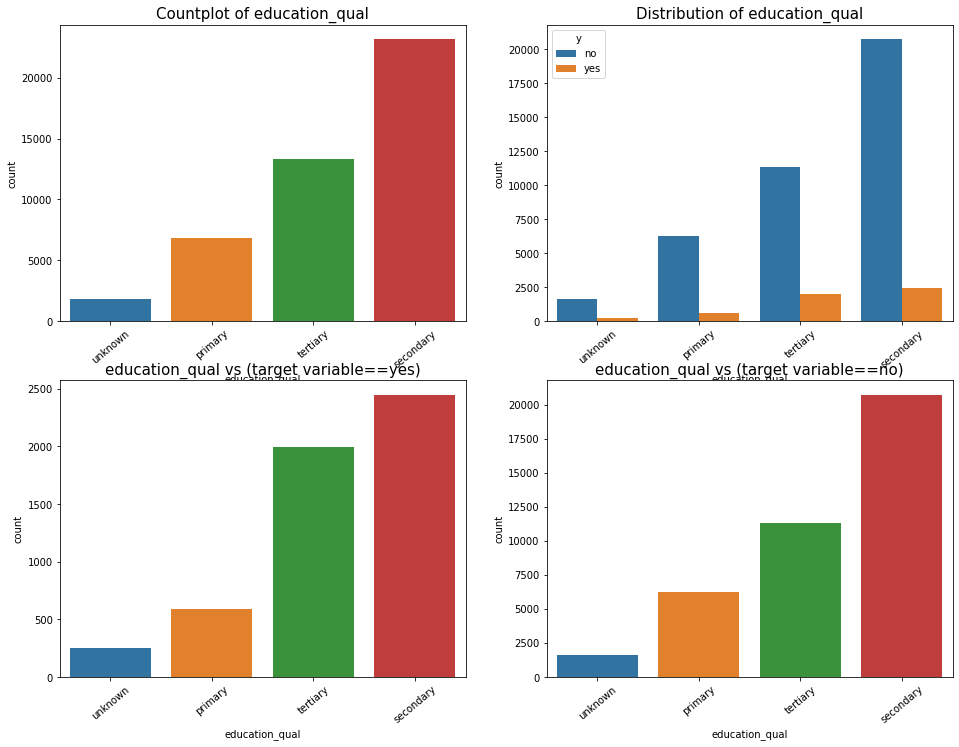

In [ ]:
plt.figure(figsize=(16,12))
feature("education_qual")

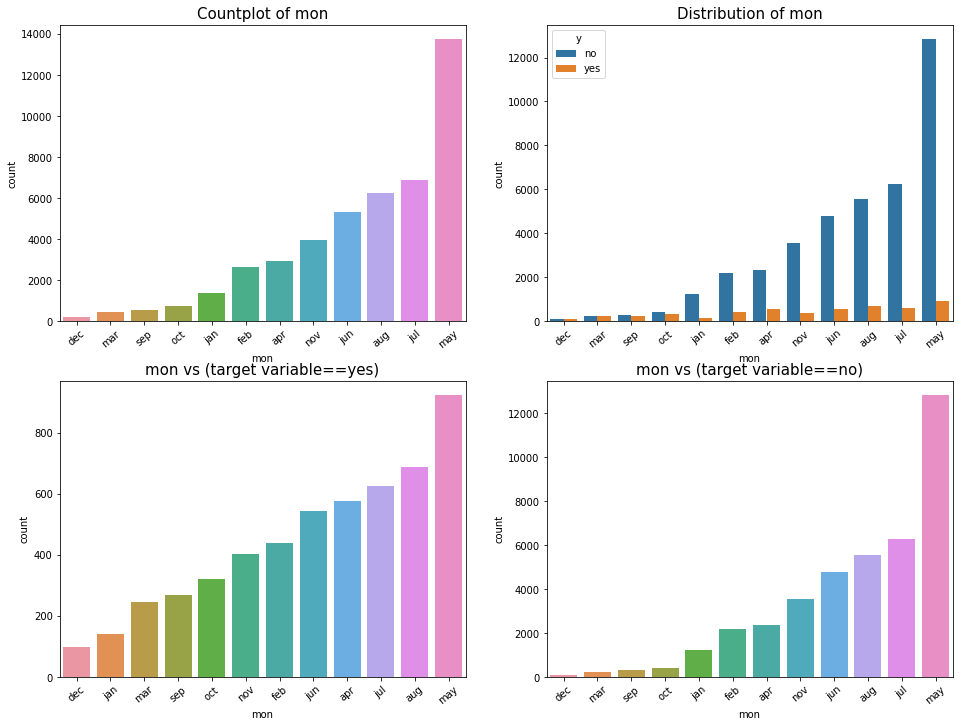

In [ ]:
plt.figure(figsize=(16,12))
feature("mon")

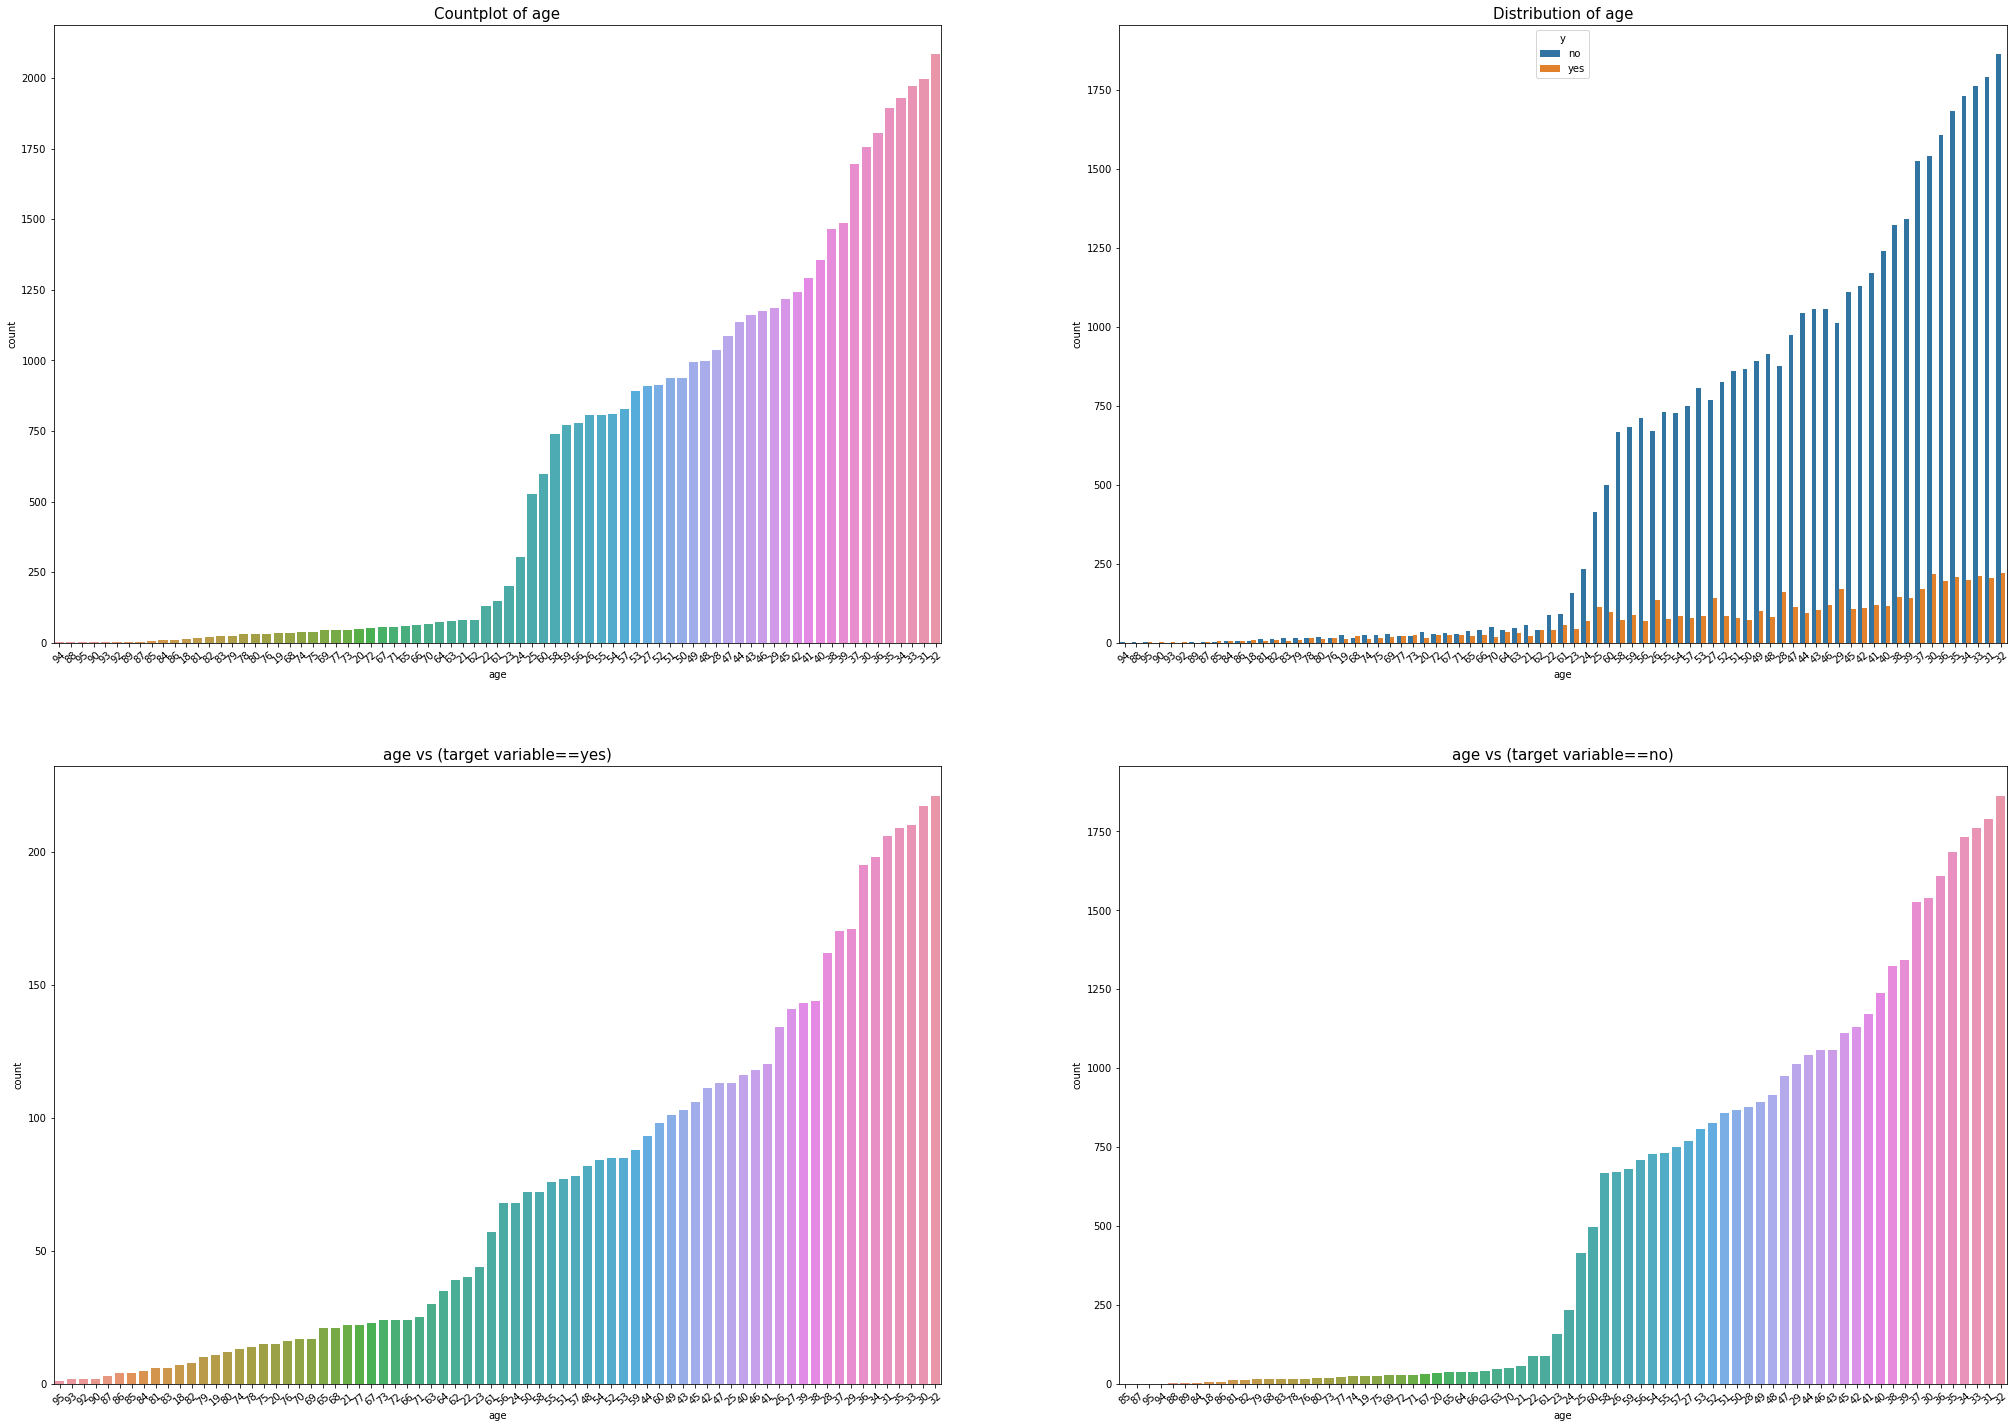

In [ ]:
plt.figure(figsize=(35,25))
feature("age")

<AxesSubplot:xlabel='y', ylabel='age'>

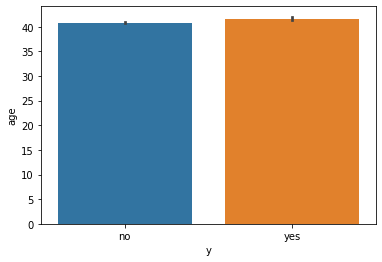

In [ ]:
sns.barplot(y='age',x='y',data=df)

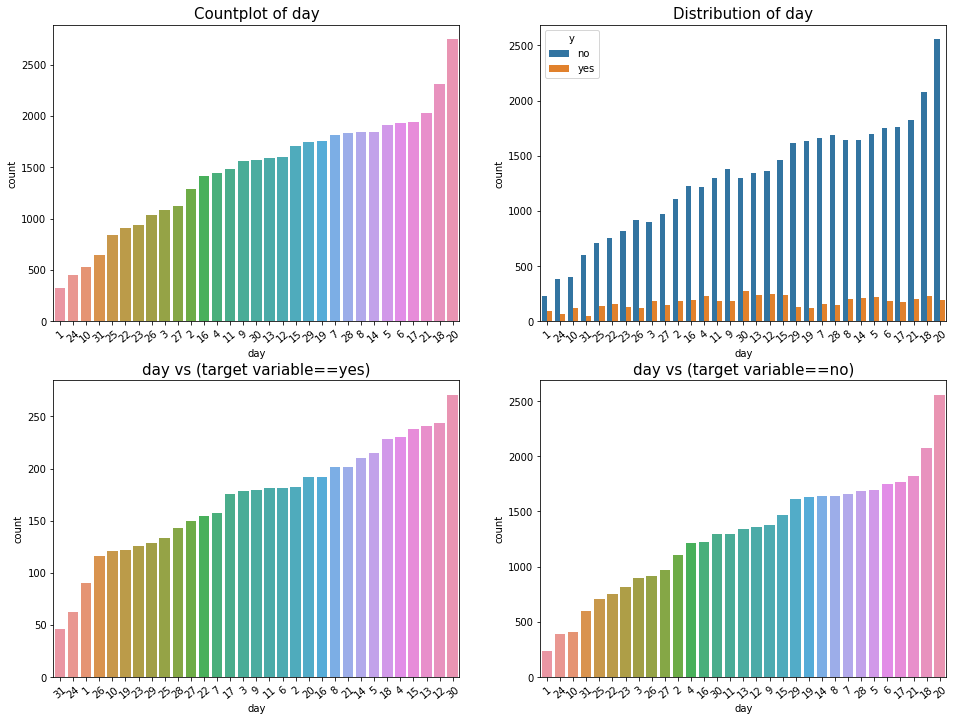

In [ ]:
plt.figure(figsize=(16,12))
feature("day")

<AxesSubplot:xlabel='y', ylabel='day'>

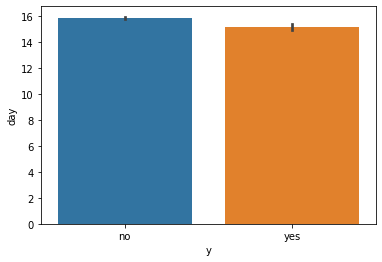

In [ ]:
sns.barplot(y='day',x='y',data=df)

<AxesSubplot:xlabel='y', ylabel='dur'>

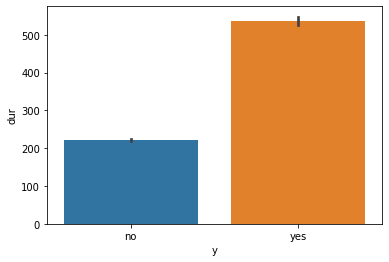

In [ ]:
sns.barplot(y='dur',x='y',data=df)

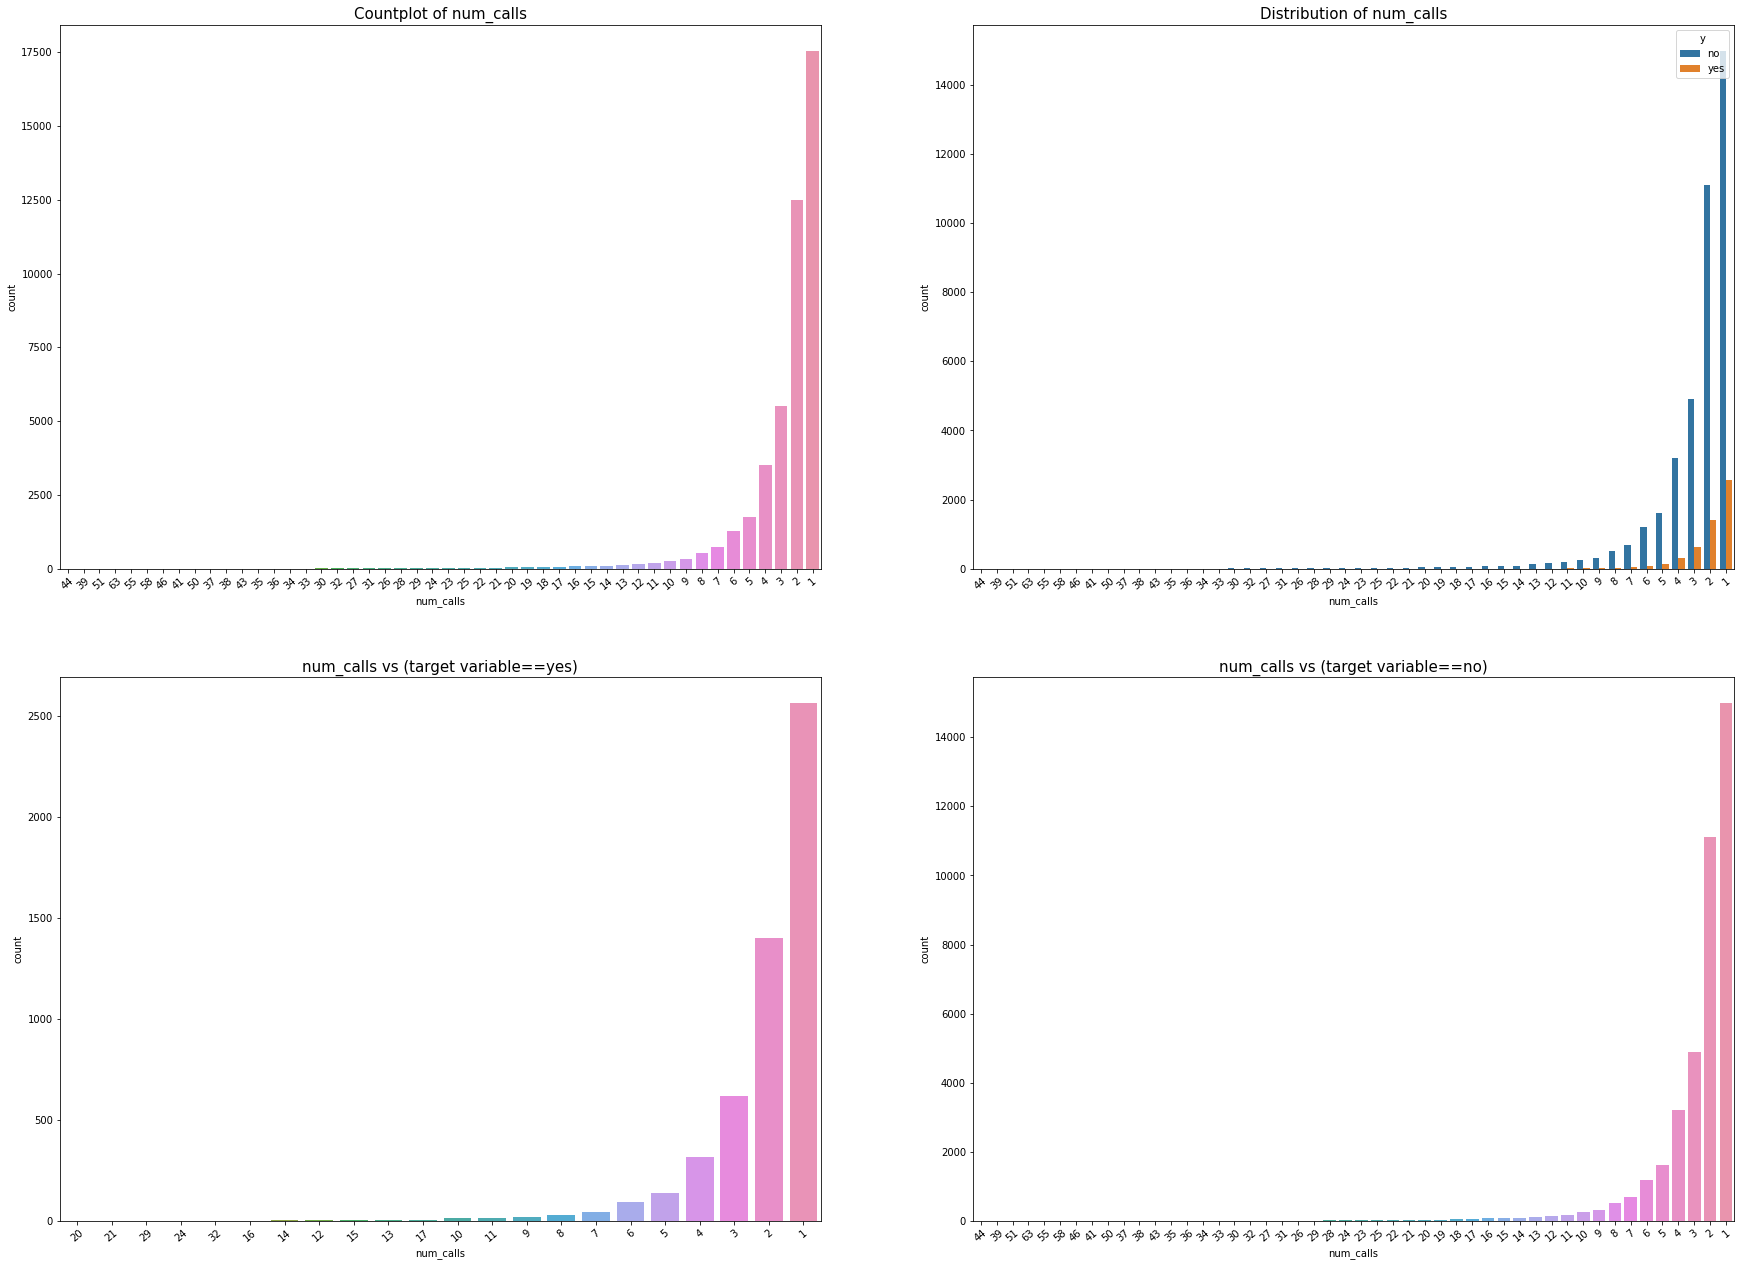

In [ ]:
plt.figure(figsize=(30,22))
feature("num_calls")

<AxesSubplot:xlabel='y', ylabel='num_calls'>

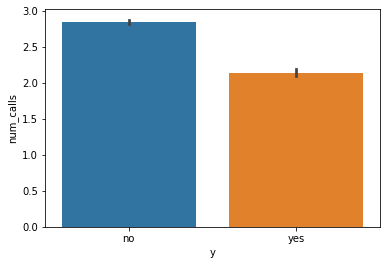

In [ ]:
sns.barplot(y='num_calls',x='y',data=df)

## **ENCODE THE DATA**

In [ ]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

### **LABEL ENCODING**

In [ ]:
df['job']=df['job'].map({'blue-collar':0,'entrepreneur':1,'housemaid':2,'services':3,'technician':4,'unknown':5,'self-employed':6,'admin.':7,'management':8,'unemployed':9,'retired':10,'student':11})
df['education_qual']=df['education_qual'].map({'primary':0,'secondary':1,'unknown':2,'tertiary':3})
df['call_type']=df['call_type'].map({'unknown':0,'telephone':1,'cellular':2})
df['mon']=df['mon'].map({'may':0,'jul':1,'jan':2,'nov':3,'jun':4,'aug':5,'feb':6,'apr':7,'oct':8,'sep':9,'dec':10,'mar':11})

### **ONE-HOT ENCODING**

In [ ]:
df= pd.get_dummies(df, columns=["marital",'prev_outcome'])
df.head()

,age,job,education_qual,call_type,day,mon,dur,num_calls,y,marital_divorced,marital_married,marital_single,prev_outcome_failure,prev_outcome_other,prev_outcome_success,prev_outcome_unknown
0,58,8,3,0,5,0,261,1,no,0,1,0,0,0,0,1
1,44,4,1,0,5,0,151,1,no,0,0,1,0,0,0,1
2,33,1,1,0,5,0,76,1,no,0,1,0,0,0,0,1
3,47,0,2,0,5,0,92,1,no,0,1,0,0,0,0,1
4,33,5,2,0,5,0,198,1,no,0,0,1,0,0,0,1


We done with the Encoding part.Now, move with the target and feature selection

In [ ]:
df.head()

,age,job,education_qual,call_type,day,mon,dur,num_calls,y,marital_divorced,marital_married,marital_single,prev_outcome_failure,prev_outcome_other,prev_outcome_success,prev_outcome_unknown
0,58,8,3,0,5,0,261,1,no,0,1,0,0,0,0,1
1,44,4,1,0,5,0,151,1,no,0,0,1,0,0,0,1
2,33,1,1,0,5,0,76,1,no,0,1,0,0,0,0,1
3,47,0,2,0,5,0,92,1,no,0,1,0,0,0,0,1
4,33,5,2,0,5,0,198,1,no,0,0,1,0,0,0,1


## **TARGET AND FEATURE SELCTION:**

In [ ]:
X = df[['age', 'job', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls','marital_divorced', 'marital_married',
       'marital_single', 'prev_outcome_failure', 'prev_outcome_other',
       'prev_outcome_success', 'prev_outcome_unknown']].values
y = df['y'].values

We have selected our features and the target variable

## **SPLITTING**

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

We have split the data 

# **Random Undersampling:**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler #  import 
rus = RandomUnderSampler() #Intialise the model
X_rus, y_rus = rus.fit_resample(X_train, y_train) #resampling the data 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

lr1 = LogisticRegression()
lr1.fit(X_rus,y_rus)
lr1.score(X_rus,y_rus)

0.801969625059326

# **Random Oversampling:**

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler() #Initialis the model 
X_ros, y_ros = ros.fit_resample(X_train, y_train) #Fit the model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

lr2 = LogisticRegression()
lr2.fit(X_ros,y_ros)
lr2.score(X_ros,y_ros)

0.7989827856025039

# **SMOTE:**

In [ ]:
from imblearn.over_sampling import SMOTE


smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X_train, y_train)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

lr3 = LogisticRegression()
lr3.fit(X_sm,y_sm)
lr3.score(X_sm,y_sm)

0.8476995305164319

In [ ]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import imblearn

## **SMOTEENN**

In [ ]:
from imblearn.combine import SMOTEENN 
smt = SMOTEENN(sampling_strategy='all') 
X_smt, y_smt = smt.fit_resample(X_train, y_train) 

In [ ]:
import collections, numpy
counter = collections.Counter(y_smt)
counter


Counter({'no': 23418, 'yes': 30588})

### **To balance the data:**

1. For Random under sampling , the model score is 81.78%
2. For Random over sampling , the model score is 80.3%
3. SMOTE, the model score is 86.03%
4. SMOTE + Tomek, the model score is 92.2%.

Here we got the best score from SMOTE+Tomek which is 92.2%.

Now,We gonna use SMOTE+Tomek technique to build the models.

# **Logistic Regression:**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

lr = LogisticRegression()
lr.fit(X_smt,y_smt)
lr.score(X_smt,y_smt)

0.9121579083805503

In [ ]:
lr.predict_proba(X_test)

array([[0.36278941, 0.63721059],
       [0.85472648, 0.14527352],
       [0.48552456, 0.51447544],
       ...,
       [0.83165282, 0.16834718],
       [0.97554056, 0.02445944],
       [0.87986134, 0.12013866]])

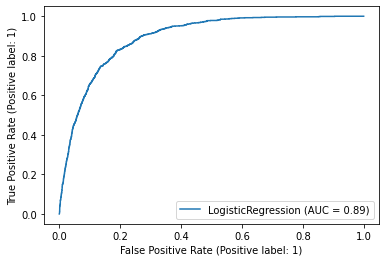

In [ ]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
plot_roc_curve(lr, X_test, y_test)

# **DECISION TREE:**

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import roc_auc_score

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import roc_auc_score 
dt = DecisionTreeClassifier() 
dt.fit(X_smt,y_smt) 
print(dt.score(X_smt,y_smt)) 
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, dt.predict_proba(X_test)[:, 1]))

1.0
AUROC on the sampled dataset :  0.7724645440797809


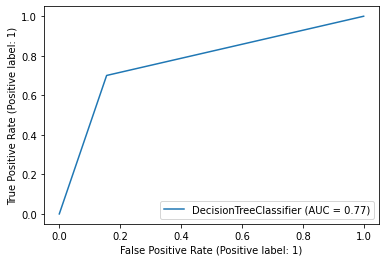

In [ ]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
plot_roc_curve(dt, X_test, y_test)

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
from sklearn.model_selection import cross_val_score #this will help me to do cross- validation
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20,40,60]:
  dt = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dt.fit(X_smt, y_smt) # the model is trained
  trainAccuracy = accuracy_score(y_smt, dt.predict(X_smt)) # this is useless information - i am showing to prove a point
  dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt, X_test, y_test, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))


Depth  :  1  Training Accuracy :  0.7875962247735053  Cross val score :  0.8810972717938688
Depth  :  2  Training Accuracy :  0.8018573509107072  Cross val score :  0.8904999266611254
Depth  :  3  Training Accuracy :  0.8684723194189632  Cross val score :  0.8949240942649
Depth  :  4  Training Accuracy :  0.910385655652437  Cross val score :  0.8994588813377012
Depth  :  5  Training Accuracy :  0.9149628340678254  Cross val score :  0.8982420671784089
Depth  :  6  Training Accuracy :  0.927143424561669  Cross val score :  0.8954775583044052
Depth  :  7  Training Accuracy :  0.9369786839666358  Cross val score :  0.8945927247836503
Depth  :  8  Training Accuracy :  0.942331334758185  Cross val score :  0.8922704493228377
Depth  :  9  Training Accuracy :  0.9499347468366401  Cross val score :  0.8912743851757687
Depth  :  10  Training Accuracy :  0.9569139982220877  Cross val score :  0.8908319072996627
Depth  :  20  Training Accuracy :  0.9992434415842333  Cross val score :  0.865945460

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import roc_auc_score 
dt = DecisionTreeClassifier(max_depth=4) 
dt.fit(X_smt,y_smt) 
print(dt.score(X_smt,y_smt)) 
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, dt.predict_proba(X_test)[:, 1]))

0.9411777743301049
AUROC on the sampled dataset :  0.8113486970788643


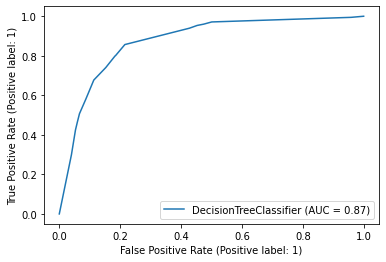

In [ ]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
plot_roc_curve(dt, X_test, y_test)

# **3. KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score 
for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50]: 
  knn= KNeighborsClassifier(i)
  knn.fit(X_smt, y_smt) 
  print("K value :", i, "Cross Value Accuracy :" , np.mean(cross_val_score(knn, X_test, y_test, cv=10)))

K value : 1 Cross Value Accuracy : 0.8517878795286755
K value : 2 Cross Value Accuracy : 0.8791073436659659
K value : 3 Cross Value Accuracy : 0.8755689874346061
K value : 4 Cross Value Accuracy : 0.8840842419205007
K value : 5 Cross Value Accuracy : 0.880435388451572
K value : 6 Cross Value Accuracy : 0.8851906810736813
K value : 7 Cross Value Accuracy : 0.8843063364787561
K value : 8 Cross Value Accuracy : 0.8853010560797927
K value : 9 Cross Value Accuracy : 0.8846378281914632
K value : 10 Cross Value Accuracy : 0.8866287341710262
K value : 20 Cross Value Accuracy : 0.8864072507700582
K value : 30 Cross Value Accuracy : 0.8853009338483352
K value : 40 Cross Value Accuracy : 0.8843054808585539
K value : 50 Cross Value Accuracy : 0.8844159780961227


In [ ]:
knn= KNeighborsClassifier(i)
knn.fit(X_smt, y_smt)
print(knn.score(X_smt,y_smt)) 
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, knn.predict_proba(X_test)[:, 1]))

0.9172325093151255
AUROC on the sampled dataset :  0.8521759337650129


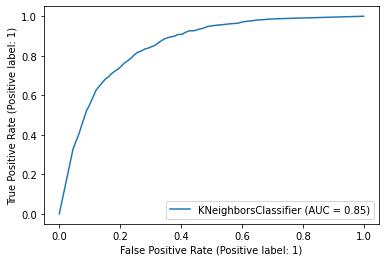

In [ ]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
plot_roc_curve(knn, X_test, y_test)

#**4. XG_Boost**


In [ ]:
import xgboost as xgb


In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score 
import numpy as np 
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]: 
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model model.fit(X_smt,y_smt) #train the model 
  print("Learning rate : ", lr," Cross-Val score : ", np.mean(cross_val_score(model, X_test, y_test, cv=10)))

Learning rate :  0.01  Cross-Val score :  0.8958090500171124
Learning rate :  0.02  Cross-Val score :  0.8962504278101011
Learning rate :  0.03  Cross-Val score :  0.896804014081064
Learning rate :  0.04  Cross-Val score :  0.8973566225003665
Learning rate :  0.05  Cross-Val score :  0.8995688896494402
Learning rate :  0.1  Cross-Val score :  0.9005649537965089
Learning rate :  0.11  Cross-Val score :  0.9010073094411577
Learning rate :  0.12  Cross-Val score :  0.9008965677406737
Learning rate :  0.13  Cross-Val score :  0.8996807314330415
Learning rate :  0.14  Cross-Val score :  0.9020034958196842
Learning rate :  0.15  Cross-Val score :  0.8994590035691588
Learning rate :  0.2  Cross-Val score :  0.9010081650613602
Learning rate :  0.5  Cross-Val score :  0.8996808536644991
Learning rate :  0.7  Cross-Val score :  0.895700019557033
Learning rate :  1  Cross-Val score :  0.8928235466679706


In [ ]:
X_smt

array([[54,  0,  1, ...,  0,  0,  1],
       [53,  2,  1, ...,  0,  0,  1],
       [28,  7,  1, ...,  0,  0,  0],
       ...,
       [47,  0,  0, ...,  0,  0,  1],
       [47,  8,  2, ...,  0,  1,  0],
       [36,  6,  1, ...,  0,  0,  0]])

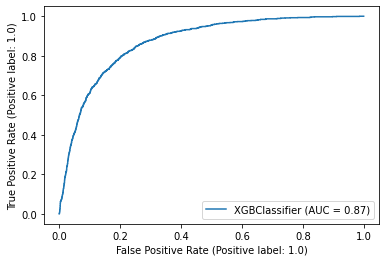

In [ ]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
model = xgb.XGBClassifier(learning_rate = 0.14, n_estimators=100, verbosity = 0) # initialise the model 
model.fit(X_smt,y_smt)
plot_roc_curve(model, X_test, y_test)

# **5. Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
classifier = RandomForestClassifier(n_estimators=100,criterion="entropy") 
classifier.fit(X_smt, y_smt) 
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

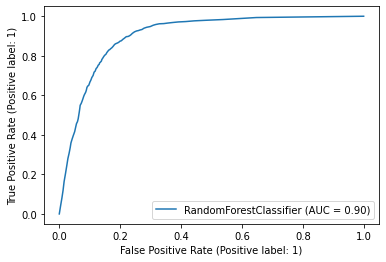

In [ ]:
plot_roc_curve(classifier, X_test, y_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
classifier = RandomForestClassifier(n_estimators=100,criterion="entropy") 
classifier.fit(X_smt, y_smt) 
y_pred = classifier.predict(X_test)
y_pred

array([1., 0., 0., ..., 0., 0., 0.])

In [ ]:
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, classifier.predict_proba(X_test)[:, 1]))

AUROC on the sampled dataset :  0.901432775341714


In [ ]:
importance = dt.feature_importances_
list(zip(importance,['age', 'job', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls','marital_divorced', 'marital_married',
       'marital_single', 'prev_outcome_failure', 'prev_outcome_other',
       'prev_outcome_success', 'prev_outcome_unknown']))

[(0.0, 'age'),
 (0.003673971708671975, 'job'),
 (0.0, 'education_qual'),
 (0.010334839718413986, 'call_type'),
 (0.0030036621252753338, 'day'),
 (0.2581960340619673, 'mon'),
 (0.693920778512392, 'dur'),
 (0.0, 'num_calls'),
 (0.0007217435147153351, 'marital_divorced'),
 (0.0, 'marital_married'),
 (0.0, 'marital_single'),
 (0.0, 'prev_outcome_failure'),
 (0.0, 'prev_outcome_other'),
 (0.0, 'prev_outcome_success'),
 (0.030148970358564096, 'prev_outcome_unknown')]

In [ ]:
importance = classifier.feature_importances_
list(zip(importance,['age', 'job', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls','marital_divorced', 'marital_married',
       'marital_single', 'prev_outcome_failure', 'prev_outcome_other',
       'prev_outcome_success', 'prev_outcome_unknown']))

[(0.030830479643807432, 'age'),
 (0.041444333808183464, 'job'),
 (0.045544099857236064, 'education_qual'),
 (0.0800428661987714, 'call_type'),
 (0.04156756081508665, 'day'),
 (0.14380356518590506, 'mon'),
 (0.417730383822897, 'dur'),
 (0.03329828067098505, 'num_calls'),
 (0.020514670247114383, 'marital_divorced'),
 (0.0809787512512491, 'marital_married'),
 (0.03743704214782327, 'marital_single'),
 (0.007798763913934314, 'prev_outcome_failure'),
 (0.0024984355958977875, 'prev_outcome_other'),
 (0.0010303595148791742, 'prev_outcome_success'),
 (0.015480407326229802, 'prev_outcome_unknown')]

In [ ]:
importance = model.feature_importances_
list(zip(importance,['age', 'job', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls','marital_divorced', 'marital_married',
       'marital_single', 'prev_outcome_failure', 'prev_outcome_other',
       'prev_outcome_success', 'prev_outcome_unknown']))

[(0.0108161, 'age'),
 (0.04455232, 'job'),
 (0.08834884, 'education_qual'),
 (0.07538245, 'call_type'),
 (0.020465108, 'day'),
 (0.14515848, 'mon'),
 (0.2846588, 'dur'),
 (0.04952067, 'num_calls'),
 (0.019397466, 'marital_divorced'),
 (0.16000743, 'marital_married'),
 (0.01555894, 'marital_single'),
 (0.0, 'prev_outcome_failure'),
 (0.0077529536, 'prev_outcome_other'),
 (0.0045965184, 'prev_outcome_success'),
 (0.073783904, 'prev_outcome_unknown')]

## **SOLUTION**

### **MODELLING:**

Models are tested to see which one can better predict consumer conversion.

1. LOGISTIC REGRESSION, the model AUROC score is 0.89
2. DECISION TREE, the model AUROC score is 0.77,
3. DECISION TREE with max depth, the model AUROC score is 0.87
4. KNN, the model AUROC score is 0.85
5. RANDOM FOREST, the model AUROC score is 0.90
6. XG BOOST CLASSIFIER, the model AUROC score is 0.9014

The model XG BOOST has the highest AUROC score, coming in at 0.914.